In [1]:
%matplotlib inline
%pylab inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import xarray as xr
import copy
import cartopy.crs as ccrs
import csv
import cartopy.feature as cft
from collections import OrderedDict

from dask.distributed import Client
import climtas.nci

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34717,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:41293,Total threads: 1
Dashboard: /proxy/45113/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:44651,


In [3]:
session = cc.database.create_session()

OperationalError: (sqlite3.OperationalError) attempt to write a readonly database
[SQL: PRAGMA user_version]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [ ]:
data = copy.deepcopy(exptdata.exptdict) 

In [7]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

### Time series of IR (5-year averaged) only positive and negative

In [6]:
dataset2 = pd.read_csv('3.2 IR_value/IR_NZ(1).csv')

X2 = dataset2.iloc[:, 1].values

w = 5 

x2 = np.convolve(X2, np.ones(w), 'valid') / w

In [73]:
def time_series_NZ():
    
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,180,1):
        t1.append(tt)

    for tt in range (1,180,10):
        t2.append(tt)
        
    for tt in c:
        t3.append(tt+1)
        
    plt.plot(t3,y2, 'r',label = 'IR_NZ 1deg')

    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of IR_NZ')
    plt.xlabel('every 5-year')
    plt.ylabel('(Sv)')
    plt.ylim([-30,-10])
    # plt.ylim([-15,6])
    
    plt.plot(T1, y21)
    plt.plot(T2, y22)
    plt.plot(T3, y23)
    
    
    savefigure('time series of IR_NZ positive and negative only')

In [8]:
T1 = np.arange(1,62)
T2 = np.arange(62,123)
T3 = np.arange(123,180)

In [9]:
trend_NZ_1 = np.polyfit(T1, x2[0:61], 1)
trend_NZ_2 = np.polyfit(T2, x2[61:122], 1)
trend_NZ_3 = np.polyfit(T3, x2[122:179], 1)

In [10]:
y21 = trend_NZ_1[1] + T1*trend_NZ_1[0]
y22 = trend_NZ_2[1] + T2*trend_NZ_2[0]
y23 = trend_NZ_3[1] + T3*trend_NZ_3[0]

In [65]:
c = a + b
c.sort()

In [69]:
y2 = []
for x in c:
    y2.append(x2[x])

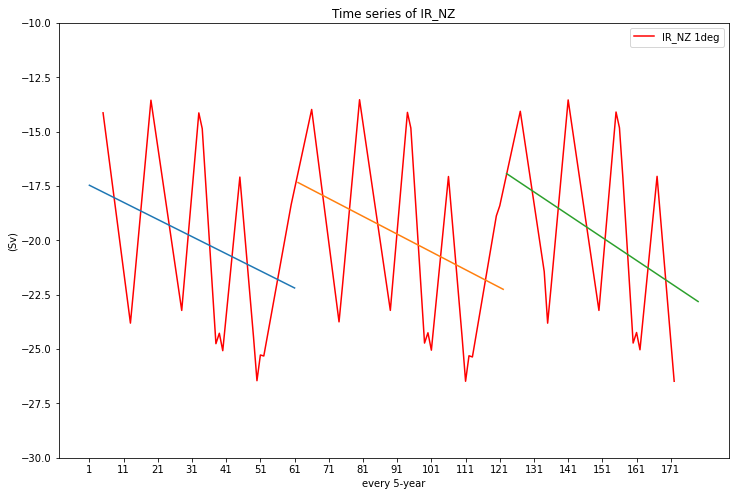

In [74]:
time_series_NZ()

### Mean and Std

In [12]:
x2_m = x2.mean()
x2_sq = x2**2       
x2_sq_m = x2_sq.mean()
x2_std = (x2_sq_m - (x2_m)**2)**0.5

In [13]:
a = []
b = []

for i in range(0,61):
    if x2[i] > y21[i]+x2_std:
        a.append(i)
    if x2[i] < y21[i]-x2_std:
        b.append(i)      

In [14]:
for i in range(61,122):
    if x2[i] > y22[i-61]+x2_std:
        a.append(i)
    if x2[i] < y22[i-61]-x2_std:
        b.append(i)      

In [15]:
for i in range(122,179):
    if x2[i] > y23[i-122]+x2_std:
        a.append(i)
    if x2[i] < y23[i-122]-x2_std:
        b.append(i)      

In [6]:
a = [4,18,32,33,34,44]
a1 = [4]
a2 = [18]
a3 = [32,33,34]
a4 = [44]
b = [11,12,13,27,37,38,39,49]
b1 = [11,12,13]
b2 = [27]
b3 = [37,38,39]
b4 = [49]

### Tau

In [7]:
tstart = pd.to_datetime('1958/01/01')
tend = pd.to_datetime('2019/01/01')

In [8]:
%%time

# ekey = '1deg_c1'
    
# expt = data[ekey]['expt']

# tau_x = cc.querying.getvar(expt, variable='tau_x', 
#                           session=session, frequency='1 monthly',
#                           start_time=str(tstart.year), 
#                           end_time=str(tend.year)).sel(time=slice(tstart,tend)).compute()
# tau_x1 = tau_x.resample(time='A').mean('time')


# tau_y = cc.querying.getvar(expt, variable='tau_y', 
#                           session=session, frequency='1 monthly',
#                           start_time=str(tstart.year), 
#                           end_time=str(tend.year)).sel(time=slice(tstart,tend)).compute()
# tau_y1 = tau_y.resample(time='A').mean('time')


ekey = '1deg_c2'
    
expt = data[ekey]['expt']

tau_x = cc.querying.getvar(expt, variable='tau_x', 
                          session=session, frequency='1 monthly',
                          start_time=str(tstart.year), 
                          end_time=str(tend.year)).sel(time=slice(tstart,tend)).compute()
tau_x2 = tau_x.resample(time='A').mean('time')


tau_y = cc.querying.getvar(expt, variable='tau_y', 
                          session=session, frequency='1 monthly',
                          start_time=str(tstart.year), 
                          end_time=str(tend.year)).sel(time=slice(tstart,tend)).compute()
tau_y2 = tau_y.resample(time='A').mean('time')


# ekey = '1deg_c3'
    
# expt = data[ekey]['expt']

# tau_x = cc.querying.getvar(expt, variable='tau_x', 
#                           session=session, frequency='1 monthly',
#                           start_time=str(tstart.year), 
#                           end_time=str(tend.year)).sel(time=slice(tstart,tend)).compute()
# tau_x3 = tau_x.resample(time='A').mean('time')


# tau_y = cc.querying.getvar(expt, variable='tau_y', 
#                           session=session, frequency='1 monthly',
#                           start_time=str(tstart.year), 
#                           end_time=str(tend.year)).sel(time=slice(tstart,tend)).compute()
# tau_y3 = tau_y.resample(time='A').mean('time')

CPU times: user 5.94 s, sys: 1.72 s, total: 7.66 s
Wall time: 16.5 s


In [18]:
# c1 = []

# for t in range (58,119,1):
#     tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
#     tend   = tstart + pd.DateOffset(years=1)

#     c1.append(str(tstart.year) +'-'+str(tend.year))
    
# c2 = []

# for t in range (58,119,1):
#     tstart = pd.to_datetime('1961/01/01') + pd.DateOffset(years=t)
#     tend   = tstart + pd.DateOffset(years=1)

#     c2.append(str(tstart.year) +'-'+str(tend.year))

# c3 = []

# for t in range (58,119,1):
#     tstart = pd.to_datetime('2022/01/01') + pd.DateOffset(years=t)
#     tend   = tstart + pd.DateOffset(years=1)

#     c3.append(str(tstart.year) +'-'+str(tend.year))
    
# c = []

# for t in range (58,241,1):
#     tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
#     tend   = tstart + pd.DateOffset(years=1)

#     c.append(str(tstart.year) +'-'+str(tend.year))

In [22]:
# tau_x1 = xr.concat(tau_x1, dim="time")
# c1 = np.array(c1)
# tau_x1 = tau_x1.assign_coords({'time': c1})

# tau_x2 = xr.concat(tau_x2, dim="time")
# c2 = np.array(c2)
# tau_x2 = tau_x2.assign_coords({'time': c2})

# tau_x3 = xr.concat(tau_x3, dim="time")
# c3 = np.array(c3)
# tau_x3 = tau_x3.assign_coords({'time': c3})

# tau_y1 = xr.concat(tau_y1, dim="time")
# c1 = np.array(c1)
# tau_y1 = tau_y1.assign_coords({'time': c1})

# tau_y2 = xr.concat(tau_y2, dim="time")
# c2 = np.array(c2)
# tau_y2 = tau_y2.assign_coords({'time': c2})

# tau_y3 = xr.concat(tau_y3, dim="time")
# c3 = np.array(c3)
# tau_y3 = tau_y3.assign_coords({'time': c3})

# ds_x = xr.concat([tau_x1, tau_x2, tau_x3], dim="time")
# ds_y = xr.concat([tau_y1, tau_y2, tau_y3], dim="time")

In [9]:
def running_average(x):

    ra = x.rolling(time=5, center=True).mean()

    return ra

In [10]:
%%time

# stack lat and lon into a single dimension called allpoints
stacked = tau_x2.stack(allpoints=['yu_ocean','xu_ocean'])
# apply the function over allpoints to calculate the trend at each point
Ds_x = stacked.groupby('allpoints').apply(running_average)
# unstack back to lat lon coordinates
Ds_unstacked_x = Ds_x.unstack('allpoints')

CPU times: user 2min 35s, sys: 5.56 s, total: 2min 41s
Wall time: 2min 34s


In [11]:
%%time

# stack lat and lon into a single dimension called allpoints
stacked = tau_y2.stack(allpoints=['yu_ocean','xu_ocean'])
# apply the function over allpoints to calculate the trend at each point
Ds_y = stacked.groupby('allpoints').apply(running_average)
# unstack back to lat lon coordinates
Ds_unstacked_y = Ds_y.unstack('allpoints')

CPU times: user 2min 36s, sys: 4.89 s, total: 2min 41s
Wall time: 2min 41s


In [12]:
tau_x_mean = Ds_unstacked_x.mean('time')
tau_y_mean = Ds_unstacked_y.mean('time')

In [13]:
tau_x_mean.to_netcdf('tau_x_mean.nc')
tau_y_mean.to_netcdf('tau_y_mean.nc')

In [16]:
Ax = []
Bx = []

for x in a:
    Ax.append(Ds_unstacked_x.isel(time=x))
    
for x in b:
    Bx.append(Ds_unstacked_x.isel(time=x))
   

Ay = []
By = []

for x in a:
    Ay.append(Ds_unstacked_y.isel(time=x))
    
for x in b:
    By.append(Ds_unstacked_y.isel(time=x))

In [17]:
tau_x_positive = xr.concat(Ax, dim="time")
tau_x_negative = xr.concat(Bx, dim="time")
tau_y_positive = xr.concat(Ay, dim="time")
tau_y_negative = xr.concat(By, dim="time")

In [18]:
tau_x_positive.to_netcdf('tau_x_positive.nc')
tau_x_negative.to_netcdf('tau_x_negative.nc')
tau_y_positive.to_netcdf('tau_y_positive.nc')
tau_y_negative.to_netcdf('tau_y_negative.nc')

In [28]:
Ax1 = []
Bx1 = []

for x in a1:
    Ax1.append(Ds_unstacked_x.isel(time=x))
    
for x in b1:
    Bx1.append(Ds_unstacked_x.isel(time=x))
    
psl_positive = xr.concat(Ax1, dim="time")
psl_negative = xr.concat(Bx1, dim="time")

psl_positive.to_netcdf('tau_x_positive1.nc')
psl_negative.to_netcdf('tau_x_negative1.nc')


Ay1 = []
By1 = []

for x in a1:
    Ay1.append(Ds_unstacked_y.isel(time=x))
    
for x in b1:
    By1.append(Ds_unstacked_y.isel(time=x))
    
psl_positive = xr.concat(Ay1, dim="time")
psl_negative = xr.concat(By1, dim="time")

psl_positive.to_netcdf('tau_y_positive1.nc')
psl_negative.to_netcdf('tau_y_negative1.nc')

In [27]:
Ax1 = []
Bx1 = []

for x in a2:
    Ax1.append(Ds_unstacked_x.isel(time=x))
    
for x in b2:
    Bx1.append(Ds_unstacked_x.isel(time=x))
    
psl_positive = xr.concat(Ax1, dim="time")
psl_negative = xr.concat(Bx1, dim="time")

psl_positive.to_netcdf('tau_x_positive2.nc')
psl_negative.to_netcdf('tau_x_negative2.nc')


Ay1 = []
By1 = []

for x in a2:
    Ay1.append(Ds_unstacked_y.isel(time=x))
    
for x in b2:
    By1.append(Ds_unstacked_y.isel(time=x))
    
psl_positive = xr.concat(Ay1, dim="time")
psl_negative = xr.concat(By1, dim="time")

psl_positive.to_netcdf('tau_y_positive2.nc')
psl_negative.to_netcdf('tau_y_negative2.nc')

In [26]:
Ax1 = []
Bx1 = []

for x in a3:
    Ax1.append(Ds_unstacked_x.isel(time=x))
    
for x in b3:
    Bx1.append(Ds_unstacked_x.isel(time=x))
    
psl_positive = xr.concat(Ax1, dim="time")
psl_negative = xr.concat(Bx1, dim="time")

psl_positive.to_netcdf('tau_x_positive3.nc')
psl_negative.to_netcdf('tau_x_negative3.nc')


Ay1 = []
By1 = []

for x in a3:
    Ay1.append(Ds_unstacked_y.isel(time=x))
    
for x in b3:
    By1.append(Ds_unstacked_y.isel(time=x))
    
psl_positive = xr.concat(Ay1, dim="time")
psl_negative = xr.concat(By1, dim="time")

psl_positive.to_netcdf('tau_y_positive3.nc')
psl_negative.to_netcdf('tau_y_negative3.nc')

In [25]:
Ax1 = []
Bx1 = []

for x in a4:
    Ax1.append(Ds_unstacked_x.isel(time=x))
    
for x in b4:
    Bx1.append(Ds_unstacked_x.isel(time=x))
    
psl_positive = xr.concat(Ax1, dim="time")
psl_negative = xr.concat(Bx1, dim="time")

psl_positive.to_netcdf('tau_x_positive4.nc')
psl_negative.to_netcdf('tau_x_negative4.nc')


Ay1 = []
By1 = []

for x in a4:
    Ay1.append(Ds_unstacked_y.isel(time=x))
    
for x in b4:
    By1.append(Ds_unstacked_y.isel(time=x))
    
psl_positive = xr.concat(Ay1, dim="time")
psl_negative = xr.concat(By1, dim="time")

psl_positive.to_netcdf('tau_y_positive4.nc')
psl_negative.to_netcdf('tau_y_negative4.nc')

### Map of composite

In [5]:
land_50m = cft.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='black',
                                        facecolor='gray',
                                        linewidth=0.5)
# cmp = plt.get_cmap('gist_ncar_r')  # confusing with the most common form of colourblindness (deuteranomaly)
cmp = plt.get_cmap('seismic')

### Tau_x

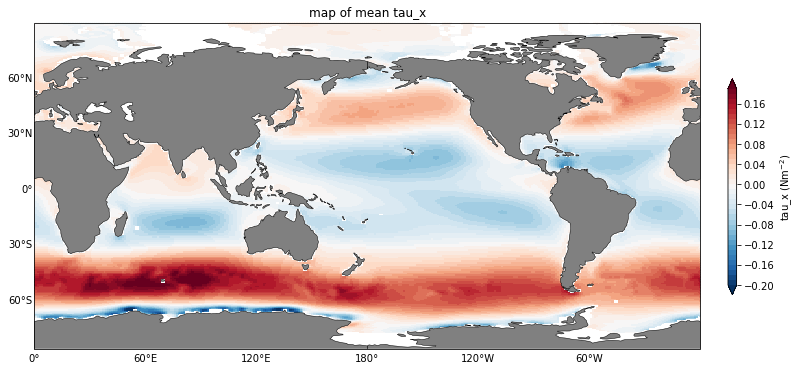

In [13]:
tau_x_mean = xr.open_dataarray('5.2 Tau/tau_x_mean.nc')

plt.figure(figsize(12,6))

# clev = np.arange(-1e-4,1e-4,1e-5)

ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(land_50m)
clev = np.arange(-0.2,0.2,0.01)

p1 = tau_x_mean.plot(levels=clev,extend='both',transform=ccrs.PlateCarree(),add_colorbar=False)
plt.title('map of mean tau_x')
gridlines = ax.gridlines(draw_labels=True) # add gridlines
gridlines.xlines = False 
gridlines.ylines = False # do not show x and y liene, necause we only want to add the longitude and latitude.
gridlines.right_labels = False
gridlines.top_labels = False

ax2 = plt.axes([0.93,0.25,0.01,0.5])
cb = plt.colorbar(p1,cax=ax2, orientation='vertical')
cb.ax.set_ylabel('tau_x (Nm$^{-2}$)')

savefigure('Map of tau_x mean')

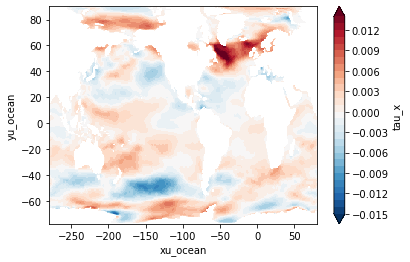

In [30]:
tau_x_positive = xr.open_dataarray('5.2 Tau/tau_x_positive.nc')

clev1 = np.arange(-0.015,0.015,0.001)
(tau_x_positive.mean('time') - tau_x_mean).plot(levels=clev,extend='both')
savefigure('Map of tau_x positive')

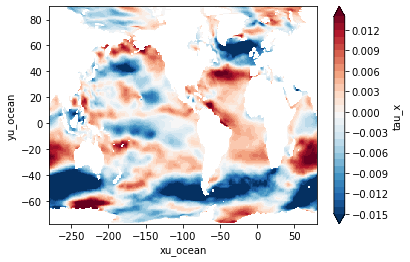

In [31]:
tau_x_positive = xr.open_dataarray('5.2 Tau/tau_x_positive1.nc')


(tau_x_positive.mean('time') - tau_x_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_x positive1')

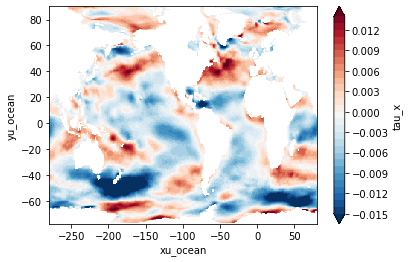

In [32]:
tau_x_positive = xr.open_dataarray('5.2 Tau/tau_x_positive2.nc')


(tau_x_positive.mean('time') - tau_x_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_x positive2')

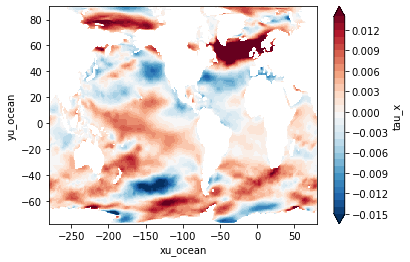

In [33]:
tau_x_positive = xr.open_dataarray('5.2 Tau/tau_x_positive3.nc')


(tau_x_positive.mean('time') - tau_x_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_x positive3')

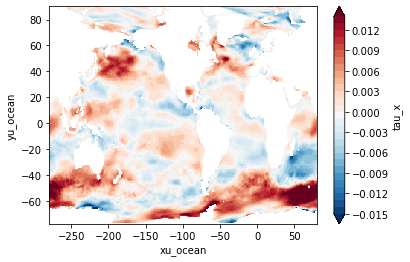

In [34]:
tau_x_positive = xr.open_dataarray('5.2 Tau/tau_x_positive4.nc')


(tau_x_positive.mean('time') - tau_x_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_x positive4')

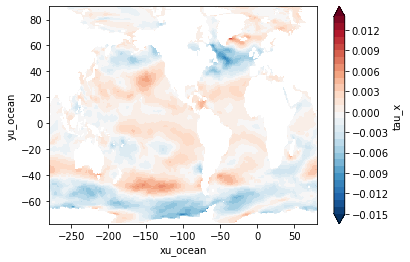

In [35]:
tau_x_negative = xr.open_dataarray('5.2 Tau/tau_x_negative.nc')

(tau_x_negative.mean('time') - tau_x_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_x negative')

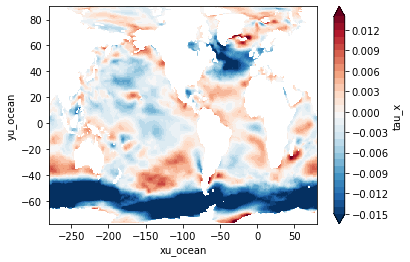

In [36]:
tau_x_negative = xr.open_dataarray('5.2 Tau/tau_x_negative1.nc')

(tau_x_negative.mean('time') - tau_x_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_x negative1')

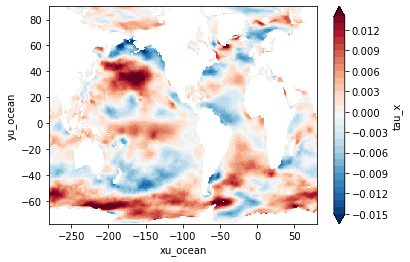

In [37]:
tau_x_negative = xr.open_dataarray('5.2 Tau/tau_x_negative2.nc')

(tau_x_negative.mean('time') - tau_x_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_x negative2')

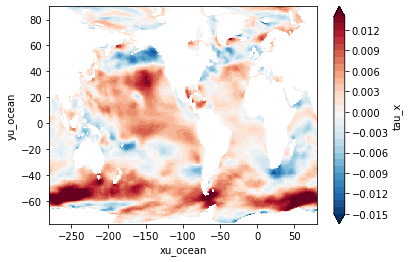

In [38]:
tau_x_negative = xr.open_dataarray('5.2 Tau/tau_x_negative3.nc')

(tau_x_negative.mean('time') - tau_x_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_x negative3')

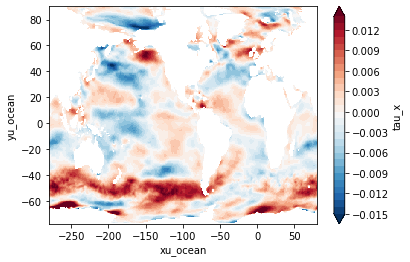

In [39]:
tau_x_negative = xr.open_dataarray('5.2 Tau/tau_x_negative4.nc')

(tau_x_negative.mean('time') - tau_x_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_x negative4')

### Tau_y

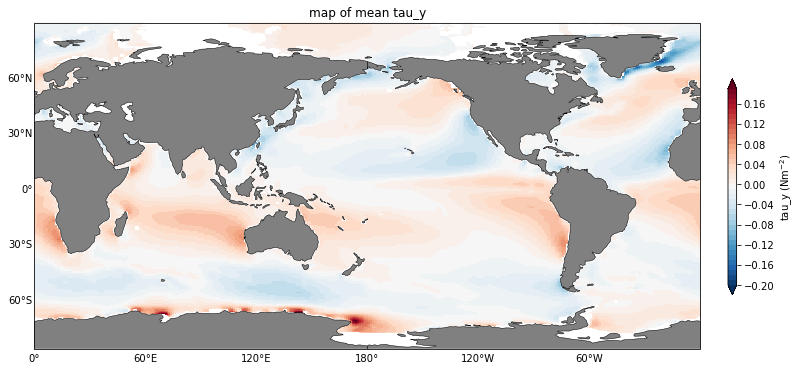

In [14]:
tau_y_mean = xr.open_dataarray('5.2 Tau/tau_y_mean.nc')

plt.figure(figsize(12,6))

# clev = np.arange(-1e-4,1e-4,1e-5)

ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(land_50m)
clev = np.arange(-0.2,0.2,0.01)

p1 = tau_y_mean.plot(levels=clev,extend='both',transform=ccrs.PlateCarree(),add_colorbar=False)
plt.title('map of mean tau_y')
gridlines = ax.gridlines(draw_labels=True) # add gridlines
gridlines.xlines = False 
gridlines.ylines = False # do not show x and y liene, necause we only want to add the longitude and latitude.
gridlines.right_labels = False
gridlines.top_labels = False

ax2 = plt.axes([0.93,0.25,0.01,0.5])
cb = plt.colorbar(p1,cax=ax2, orientation='vertical')
cb.ax.set_ylabel('tau_y (Nm$^{-2}$)')

savefigure('Map of tau_y mean')

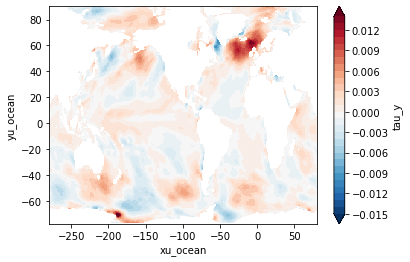

In [19]:
tau_y_positive = xr.open_dataarray('5.2 Tau/tau_y_positive.nc')

clev1 = np.arange(-0.015,0.015,0.001)
(tau_y_positive.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y positive')

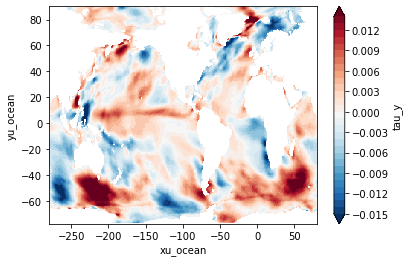

In [20]:
tau_y_positive = xr.open_dataarray('5.2 Tau/tau_y_positive1.nc')

(tau_y_positive.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y positive1')

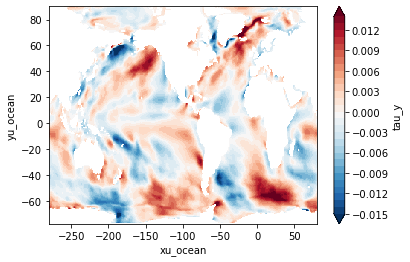

In [21]:
tau_y_positive = xr.open_dataarray('5.2 Tau/tau_y_positive2.nc')

(tau_y_positive.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y positive2')

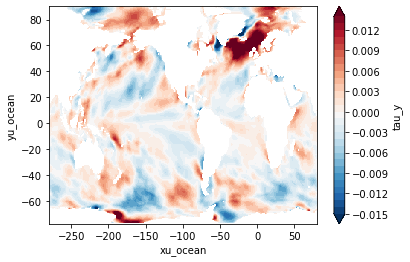

In [22]:
tau_y_positive = xr.open_dataarray('5.2 Tau/tau_y_positive3.nc')

(tau_y_positive.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y positive3')

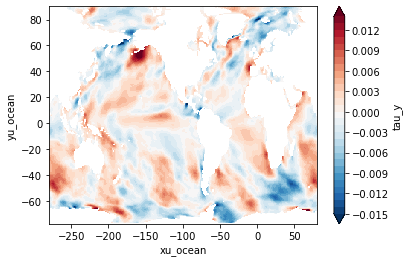

In [23]:
tau_y_positive = xr.open_dataarray('5.2 Tau/tau_y_positive4.nc')

(tau_y_positive.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y positive4')

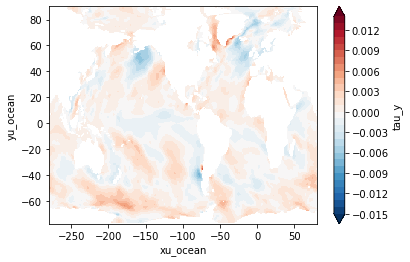

In [24]:
tau_y_negative = xr.open_dataarray('5.2 Tau/tau_y_negative.nc')

(tau_y_negative.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y negative')

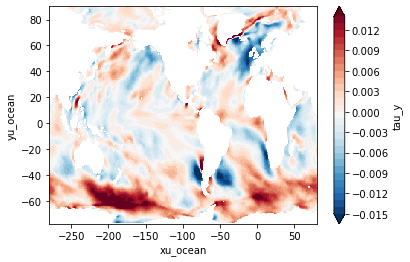

In [25]:
tau_y_negative = xr.open_dataarray('5.2 Tau/tau_y_negative1.nc')

(tau_y_negative.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y negative1')

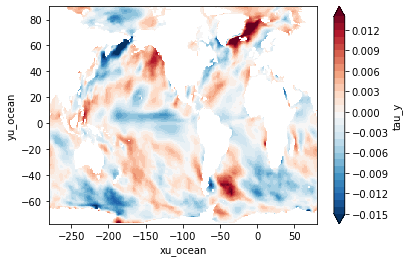

In [26]:
tau_y_negative = xr.open_dataarray('5.2 Tau/tau_y_negative2.nc')

(tau_y_negative.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y negative2')

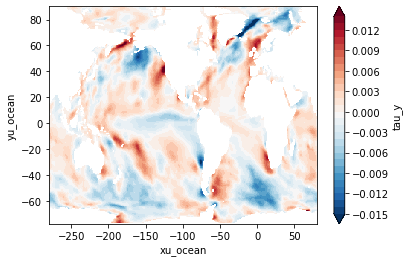

In [27]:
tau_y_negative = xr.open_dataarray('5.2 Tau/tau_y_negative3.nc')

(tau_y_negative.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y negative3')

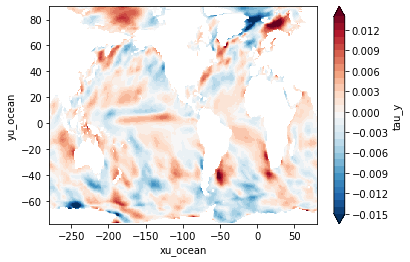

In [28]:
tau_y_negative = xr.open_dataarray('5.2 Tau/tau_y_negative4.nc')

(tau_y_negative.mean('time') - tau_y_mean).plot(levels=clev1,extend='both')
savefigure('Map of tau_y negative4')